## 4.基于逻辑回归分类算法的信用卡欺诈检测

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [3]:
data = pd.read_csv('./data/data_creditcard.csv',encoding='gbk')
data

,时间,特征1,特征2,特征3,特征4,特征5,特征6,特征7,特征8,特征9,...,特征21,特征22,特征23,特征24,特征25,特征26,特征27,特征28,交易金额,类别
0,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
1,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
2,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
4,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284792,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284793,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284794,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284795,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0


Text(0, 0.5, 'Frequency')

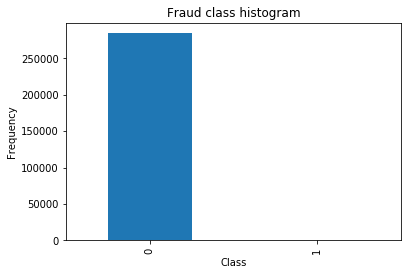

In [6]:
count_classes = pd.value_counts(data['类别'],sort=True)
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [72]:
from sklearn.preprocessing import StandardScaler
data['标准化交易金额'] = StandardScaler().fit_transform(data['交易金额'].values.reshape(-1, 1))

In [73]:
data = data.drop(['时间','交易金额'],axis=1)
data

,特征1,特征2,特征3,特征4,特征5,特征6,特征7,特征8,特征9,特征10,...,特征21,特征22,特征23,特征24,特征25,特征26,特征27,特征28,类别,标准化交易金额
0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.338549
1,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.333272
2,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,-0.190103
3,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,0.019394
4,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,-0.338509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284792,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,0,-0.331273
284793,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,0,-0.257070
284794,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,0,-0.033420
284795,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,0,-0.342508


In [74]:
X = data.iloc[:, data.columns != '类别']
y = data.iloc[:, data.columns == '类别']

number_records_fraud = len(data[data.类别 == 1])
fraud_indices = np.array(data[data.类别 == 1].index)

normal_indices = data[data.类别 == 0].index 

random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
                                                                              
random_normal_indices = np.array(random_normal_indices)

under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != '类别']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == '类别']

print("正常样本占下采样样本比例: ", len(under_sample_data[under_sample_data.类别 == 0])/len(under_sample_data))
print("异常样本占下采样样本比例: ", len(under_sample_data[under_sample_data.类别 == 1])/len(under_sample_data))
print("下采样策略总体样本数量: ", len(under_sample_data))

正常样本占下采样样本比例:  0.5
异常样本占下采样样本比例:  0.5
下采样策略总体样本数量:  984


In [75]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("原始训练集包含样本数量: ", len(X_train))
print("原始测试集包含样本数量: ", len(X_test))
print("原始样本总数: ", len(X_train)+len(X_test))

X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)


print("")
print("下采样训练集包含样本数量: ", len(X_train_undersample))
print("下采样测试集包含样本数量: ", len(X_test_undersample))
print("下采样样本总数:", len(X_train_undersample)+len(X_test_undersample))

原始训练集包含样本数量:  199357
原始测试集包含样本数量:  85440
原始样本总数:  284797

下采样训练集包含样本数量:  688
下采样测试集包含样本数量:  296
下采样样本总数: 984


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score

In [77]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(5,shuffle=False)
   
    c_param_range = [0.01,0.1,1,10,100]
    
    results_table = pd.DataFrame(columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range
    
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('正则化惩罚力度: ', c_param)
        print('-------------------------------------------')
        print('')
        
        recall_accs = []
        
        for iteration, indices in enumerate(fold.split(x_train_data),start=1):
            
            lr = LogisticRegression(C = c_param, penalty = 'l1',solver='liblinear')

            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': 召回率= ', recall_acc)

        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('平均召回率: ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].astype(float).idxmax()]['C_parameter']
    
    print('*********************************************************************************')
    print('效果最好的模型所选参数 = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [78]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

-------------------------------------------
正则化惩罚力度:  0.01
-------------------------------------------

Iteration  1 : 召回率=  0.9726027397260274
Iteration  2 : 召回率=  0.9315068493150684
Iteration  3 : 召回率=  1.0
Iteration  4 : 召回率=  0.972972972972973
Iteration  5 : 召回率=  0.9696969696969697

平均召回率:  0.9693559063422077

-------------------------------------------
正则化惩罚力度:  0.1
-------------------------------------------

Iteration  1 : 召回率=  0.8493150684931506
Iteration  2 : 召回率=  0.863013698630137
Iteration  3 : 召回率=  0.9491525423728814
Iteration  4 : 召回率=  0.9324324324324325
Iteration  5 : 召回率=  0.8787878787878788

平均召回率:  0.894540324143296

-------------------------------------------
正则化惩罚力度:  1
-------------------------------------------

Iteration  1 : 召回率=  0.863013698630137
Iteration  2 : 召回率=  0.9041095890410958
Iteration  3 : 召回率=  0.9830508474576272
Iteration  4 : 召回率=  0.9459459459459459
Iteration  5 : 召回率=  0.9090909090909091

平均召回率:  0.921042198033143

-------------------------

In [91]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm,cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

测试集中的召回率:  0.9319727891156463


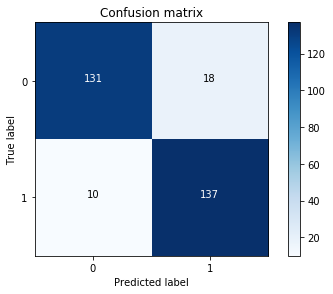

In [80]:
import itertools
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("测试集中的召回率: ",cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

测试集中的召回率:  0.9019607843137255


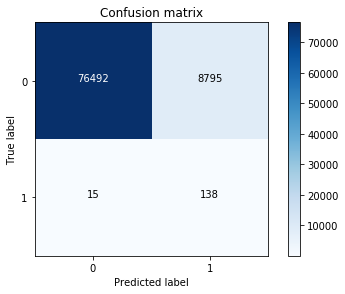

In [81]:
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("测试集中的召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [82]:
best_c = printing_Kfold_scores(X_train,y_train)

-------------------------------------------
正则化惩罚力度:  0.01
-------------------------------------------

Iteration  1 : 召回率=  0.45454545454545453
Iteration  2 : 召回率=  0.5909090909090909
Iteration  3 : 召回率=  0.6268656716417911
Iteration  4 : 召回率=  0.5
Iteration  5 : 召回率=  0.53125

平均召回率:  0.5407140434192673

-------------------------------------------
正则化惩罚力度:  0.1
-------------------------------------------

Iteration  1 : 召回率=  0.5757575757575758
Iteration  2 : 召回率=  0.6666666666666666
Iteration  3 : 召回率=  0.6865671641791045
Iteration  4 : 召回率=  0.5526315789473685
Iteration  5 : 召回率=  0.53125

平均召回率:  0.602574597110143

-------------------------------------------
正则化惩罚力度:  1
-------------------------------------------

Iteration  1 : 召回率=  0.5909090909090909
Iteration  2 : 召回率=  0.6818181818181818
Iteration  3 : 召回率=  0.6417910447761194
Iteration  4 : 召回率=  0.5789473684210527
Iteration  5 : 召回率=  0.546875

平均召回率:  0.608068137184889

-------------------------------------------
正则化惩罚力度: 

测试集中的召回率:  0.5816993464052288


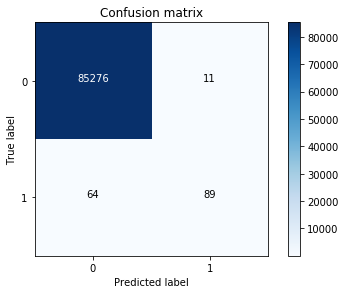

In [83]:
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample = lr.predict(X_test.values)

cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)

print("测试集中的召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

测试集中的召回率:  1.0
测试集中的召回率:  1.0
测试集中的召回率:  1.0
测试集中的召回率:  0.9795918367346939
测试集中的召回率:  0.9319727891156463
测试集中的召回率:  0.8571428571428571
测试集中的召回率:  0.8299319727891157
测试集中的召回率:  0.7414965986394558
测试集中的召回率:  0.5850340136054422


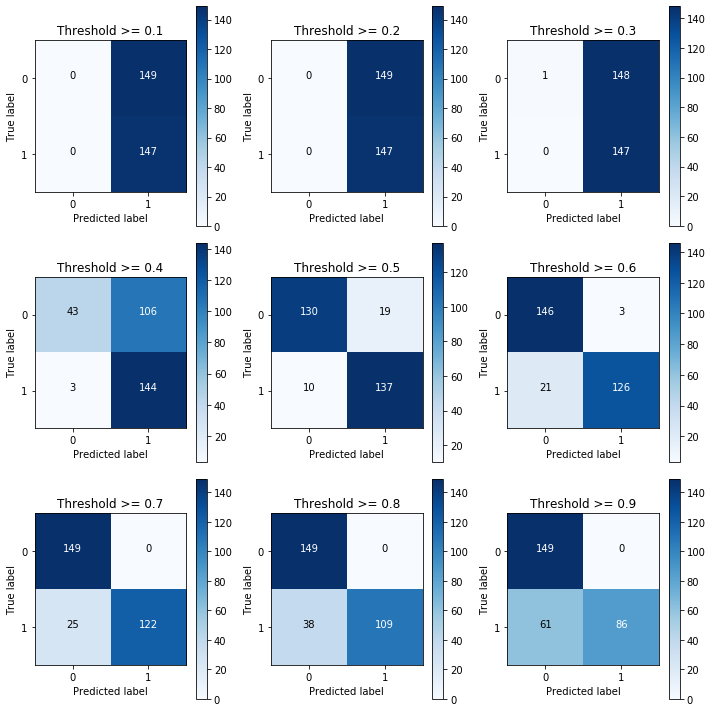

In [84]:
lr = LogisticRegression(C = 0.01, penalty = 'l1',solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("测试集中的召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

In [85]:
import pandas as pd 
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [86]:
credit_cards=pd.read_csv('./data/data_creditcard.csv',encoding='gbk')

columns=credit_cards.columns
features_columns=columns.delete(len(columns)-1)

features=credit_cards[features_columns]
labels=credit_cards['类别']

In [87]:
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=0)

In [88]:
oversampler=SMOTE(random_state=0)
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)

In [89]:
len(os_labels[os_labels==1])

227450

In [90]:
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features,os_labels)

-------------------------------------------
正则化惩罚力度:  0.01
-------------------------------------------

Iteration  1 : 召回率=  0.8831168831168831
Iteration  2 : 召回率=  0.93125
Iteration  3 : 召回率=  0.9650256773508057
Iteration  4 : 召回率=  0.9582215871620137
Iteration  5 : 召回率=  0.9587381842163113

平均召回率:  0.9392704663692028

-------------------------------------------
正则化惩罚力度:  0.1
-------------------------------------------

Iteration  1 : 召回率=  0.8896103896103896
Iteration  2 : 召回率=  0.93125
Iteration  3 : 召回率=  0.966132459713122
Iteration  4 : 召回率=  0.9596284897779732
Iteration  5 : 召回率=  0.9598373268850297

平均召回率:  0.9412917331973029

-------------------------------------------
正则化惩罚力度:  1
-------------------------------------------

Iteration  1 : 召回率=  0.8896103896103896
Iteration  2 : 召回率=  0.93125
Iteration  3 : 召回率=  0.9665751726580485
Iteration  4 : 召回率=  0.9604418553528248
Iteration  5 : 召回率=  0.9562980874917564

平均召回率:  0.9408351010226038

---------------------------------------

测试集中的召回率:  0.8761904761904762


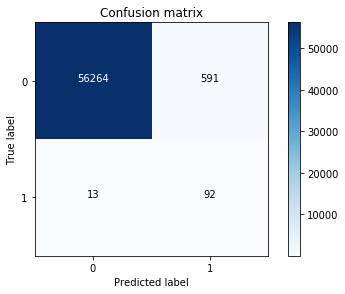

In [92]:
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear')
lr.fit(os_features,os_labels.values.ravel())
y_pred = lr.predict(features_test.values)

cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)

print("测试集中的召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()